<a href="https://colab.research.google.com/github/Nazelord/ML-AI-Workshop/blob/main/lec1_partial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Headstarter Zero To Hero Lecture #1

The following code and lecture are entirely from Andrej Karpathy's famous Zero To Hero series. In this lecture series we will go through the YouTube videos together to learn more about neural networks, with the goal of coding GPT2 at the end of the series

## What Is A Derivative?

The limit definition is the most important here:
https://en.wikipedia.org/wiki/Derivative

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Value Object

Now let's implement a simple Value object that can add and multiply, as well as keep track of which operations came before it.

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

a = Value(2.0)

## Visualizing The DAG

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

Now we want to calculate the derivative of the output with respect to each of the leaf nodes. We will calculate this by first determining dL/dd or dL/de (i.e. the intermediate values) and then backpropagating using the Chain Rule all the way down to the leaf nodes.

https://en.wikipedia.org/wiki/Chain_rule

What is the derivative of L with respect to L? As in, if I change L by a factor of 2, how much will L change? The answer is obviously 1/1.

Let's verify using the limit definition of the derivative.

In [ ]:
def f():
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)


Let's verify dL/dd and dL/df

## Chain Rule

Understanding this is the crux of back propagation, if we can figure out dL/dc or dL/de we would be able to determine how inputs to the mathematical expression affect the final loss, even if there are many operations in between the initial nodes and the end.

Chain rule tells us dL/dc = dL/dd * dd/dc

As put by George F. Simmons: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."

You can see L became less negative, so it increased.

## Neural Networks

Search up cs231n neuron on Google, you will find an image of a mathematical neuron that takes in input from various _prev neurons, has a cell body that multiplies all these inputs by a weight and adds them, adds a certain amount of bias to represent "trigger-happy"-ness and then returns the output.

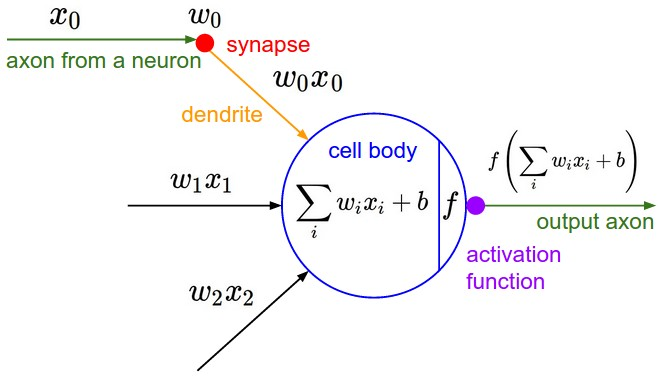

In [ ]:
from IPython.display import Image, display
display(Image(filename='cell_body.jpeg' ))

After the output is calculated, there is an activation function. This 'squashing' function ensures that all outputs are bounded in some way. ReLU makes sure the output is negative and the tanh function keeps it between [-1,1]. These introduce non-linearities into the neural network so its not simply just a bunch of linear operations (multiplications and divisions).

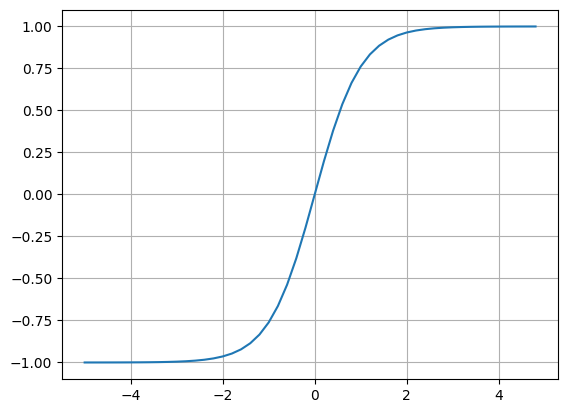

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

## Single Neuron

## Backpropagation Algorithm

## Debugging

a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

This is wrong! If b = 2a, then db/da should be 2 not 1! How do we fix this?

https://en.wikipedia.org/wiki/Chain_rule

## Code Cleanup

Now let's do rmul which allows us to do 2*a or a*2

In [ ]:
# Now we do exp(), pow() and division.
# exp() is pretty simple but look at division
# a / b
# a * (1/b)
# a * (b**-1)

# Let's also do neg() and sub()

In [ ]:
## Final verification

Now let's verify its the same as before when we use the exp() function and divide() to do tanh()

## PyTorch Introduction

In [ ]:
import torch

What does requires_grad do? It turns on our autograd functionality where for all operations involving this tensor we build a computation graph, and when backward() is called, compute d_output/d_this_tensor.

## Neural Net

## Backwards Pass

## Loss Functions

## Simple Training Loop

## Real PyTorch Code!

https://github.com/pytorch/pytorch/blob/main/aten/src/ATen/native/cpu/BinaryOpsKernel.cpp#L974-L1019